In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import scipy.io as sio
from scipy import stats
import glob
import sys


%load_ext autoreload
%autoreload 1
%aimport CybergloveMethods 

# Can hand augmeentation change the way wee use our hands?

To assess the changes in finger coordination, we tracked the kinematics of the augmented (right) hand of peoplle training to use the Third Thumb. To this extent, we have used flex sensors embedded in a dataglove (CyberGlove, Virtual Technologies, Palo Alto, CA, USA). Data was sampled continuously at 100 Hz using Shadow Robot’s CyberGlove interface for the Robot Operating System.

This noteebook is used for **data explooration** on the group level. Single participamnt visuallisations and statistical analyses can be found in separate notebooks



In [2]:
path = '/Users/paulina/Desktop/Studies/Cyberglove/'
aug = ['SF5', 'SF6', 'SF7', 'SF8', 'SF11', 'SF12', 'SF13', 'SF14', 'SF15', 'SF16', 'SF17', 'SF19', 'SF21', 'SF22', 'SF23', 'SF24']
ctr = ['CF1', 'CF2', 'CF4', 'CF6', 'CF7', 'CF8', 'CF9', 'CF10', 'CF11', 'CF12']

### PIJ

Load in the augmented dataset

In [3]:
# first subject 
temp = sio.loadmat(path + aug[0] + '/Matrices-PIJ.mat')
augR1 = temp['R1']
augR5 = temp['R5']
augBeta1 = temp['Beta1']
augBeta5 = temp['Beta5']
augMulti = temp['Multi']

for subj in aug[1:]:
    temp = sio.loadmat(path + subj + '/Matrices-PIJ.mat')
    augR1 = np.dstack([augR1, temp['R1']])
    augR5 = np.dstack([augR5, temp['R5']])
    augBeta1 = np.dstack([augBeta1, temp['Beta1']])
    augBeta5 = np.dstack([augBeta5, temp['Beta5']])
    augMulti = np.dstack([augMulti, temp['Multi']])

#sio.savemat('data/aug', {'R1': augR1, 'R5': augR5})

Load in control dataset

In [4]:
# first subject 
temp = sio.loadmat(path + ctr[0] + '/Matrices-PIJ.mat')
ctrR1 = temp['R1']
ctrR5 = temp['R5']
ctrBeta1 = temp['Beta1']
ctrBeta5 = temp['Beta5']
ctrMulti = temp['Multi']

for subj in ctr[1:]:
    temp = sio.loadmat(path + subj + '/Matrices-PIJ.mat')
    ctrR1 = np.dstack([ctrR1, temp['R1']])
    ctrR5 = np.dstack([ctrR5, temp['R5']])
    ctrBeta1 = np.dstack([ctrBeta1, temp['Beta1']])
    ctrBeta5 = np.dstack([ctrBeta5, temp['Beta5']])
    ctrMulti = np.dstack([ctrMulti, temp['Multi']])
    
#sio.savemat('data/ctr', {'R1': ctrR1, 'R5': ctrR5})

[Text(0, 0.5, 'T'),
 Text(0, 1.5, 'I'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'R'),
 Text(0, 4.5, 'P')]

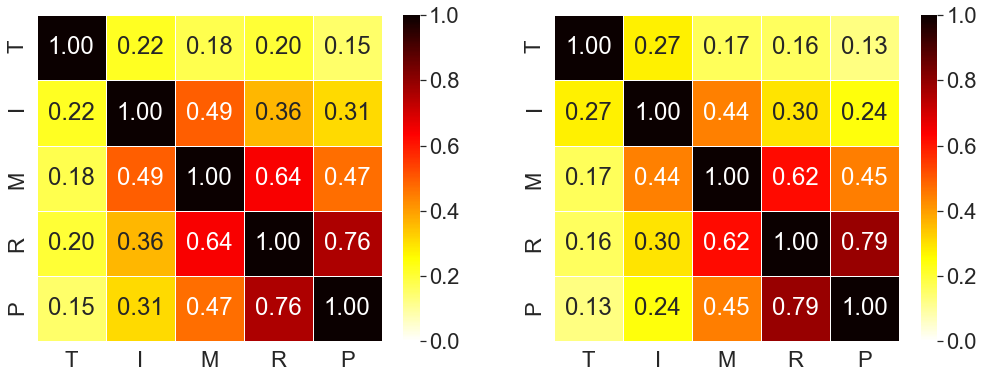

In [5]:
sns.set(font_scale = 2)
plt.figure(figsize=(17, 6))
fin_label = ['T','I','M','R','P']
ax1 = plt.subplot(121)
ax1 = sns.heatmap(abs(ctrR1).mean(axis=2), annot=True, linewidths=.5, fmt='.2f', cmap= 'hot_r', vmin=0, vmax=1)
ax1.set_xticklabels(fin_label)
ax1.set_yticklabels(fin_label)

ax2 = plt.subplot(122)
ax2 = sns.heatmap(abs(ctrR5).mean(axis=2), annot=True, linewidths=.5, fmt='.2f', cmap= 'hot_r',vmin=0,vmax=1)
ax2.set_xticklabels(fin_label)
ax2.set_yticklabels(fin_label)

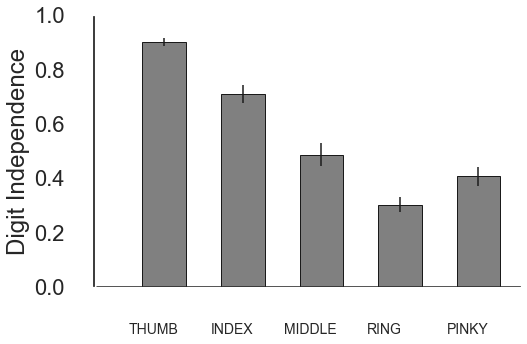

In [6]:
sns.set(font_scale = 2)
width = 0.5 
error_kw = {'capsize': 10, 'capthick': 1, 'ecolor': 'black','linewidth': 1}
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

plt.bar(0.8, 1-ctrMulti.mean(axis=2)[0][0], width, alpha=1, color='grey', edgecolor='k', linewidth=1, yerr=np.array([0, ctrMulti.std(axis=2)[0][0]/np.sqrt(len(ctr))])[1]) 
plt.bar(1.7, 1-ctrMulti.mean(axis=2)[0][1], width, alpha=1, color='grey', edgecolor='k', linewidth=1, yerr=np.array([0, ctrMulti.std(axis=2)[0][1]/np.sqrt(len(ctr))])[1]) 
plt.bar(2.60, 1-ctrMulti.mean(axis=2)[0][2], width, alpha=1, color='grey',edgecolor='k', linewidth=1, yerr=np.array([0, ctrMulti.std(axis=2)[0][2]/np.sqrt(len(ctr))])[1]) 
plt.bar(3.5, 1-ctrMulti.mean(axis=2)[0][3], width, alpha=1, color='grey', edgecolor='k', linewidth=1, yerr=np.array([0, ctrMulti.std(axis=2)[0][3]/np.sqrt(len(ctr))])[1])
plt.bar(4.4, 1-ctrMulti.mean(axis=2)[0][4], width, alpha=1, color='grey', edgecolor='k', linewidth=1, yerr=np.array([0, ctrMulti.std(axis=2)[0][4]/np.sqrt(len(ctr))])[1]) 

# Set the y axis label
ax.set_ylabel('Digit Independence')

# Set the position of the x ticks
ax.set_xticks([0.675, 1.575, 2.475, 3.325, 4.275])

# Set the labels for the x ticks
ax.set_xticklabels(["THUMB", "INDEX", "MIDDLE", "RING", "PINKY"])
ax.tick_params(axis='x', pad=30, labelsize=14)
# Add gridline
#ax.grid(color='k', linestyle='--', linewidth=0.5, axis ='y', which="both")
ax.set_facecolor('xkcd:white')
plt.ylim((0, 1))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
#ax.legend(['Augmented','Controls'],loc='lower left', bbox_to_anchor=(1, 0.5))
ax.axhline(0, xmin=0.05, color="black")
ax.axvline(0, color="black")
plt.savefig('Cyberglove-DigitIndependence.svg')
plt.show()


### Average D1 and D5

In [9]:
augAll = (augR5**2+augR1**2)/2
ctrAll = (ctrR5**2+ctrR1**2)/2

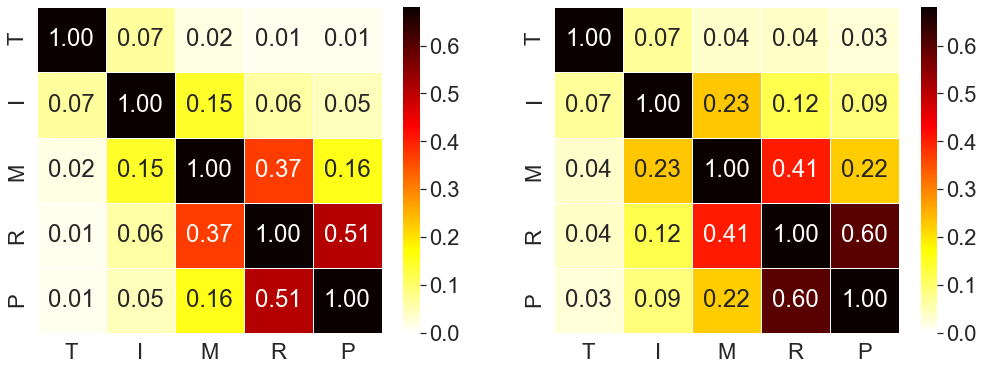

In [11]:
plt.figure(figsize=(17, 6))
fin_label = ['T', 'I', 'M', 'R', 'P']
ax1 = plt.subplot(121)
ax1 = sns.heatmap(augAll.mean(axis=2), annot=True, linewidths=.5, fmt='.2f',cmap= 'hot_r', vmin=0, vmax=0.68)
ax1.set_xticklabels(fin_label)
ax1.set_yticklabels(fin_label)

ax2 = plt.subplot(122)
ax2 = sns.heatmap(ctrAll.mean(axis=2), annot=True, linewidths=.5, fmt='.2f',cmap= 'hot_r', vmin=0, vmax=0.68)
ax2.set_xticklabels(fin_label)
ax2.set_yticklabels(fin_label)
#plt.savefig('Cyberglove-Augmented&Controls.svg')
plt.show()

## Augmented Av - Controls Av

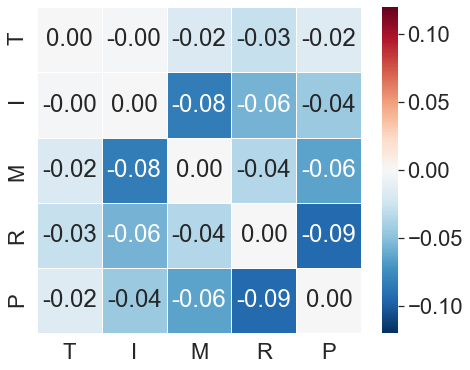

In [12]:
plt.figure(figsize=(16, 6))

ax2 = plt.subplot(122)
ax2 = sns.heatmap(augAll.mean(axis=2)-ctrAll.mean(axis=2), annot=True, linewidths=.5, fmt='.2f',cmap= 'RdBu_r', vmin=-0.12, vmax=0.12)
ax2.set_xticklabels(fin_label)
ax2.set_yticklabels(fin_label)
#plt.savefig('CG-Diff.svg')
plt.show()

### Average inter-digit coupling

In [13]:
augAv = np.zeros([augAll.shape[2],10])
for d in range(0,augAll.shape[2]):
    augAv[d,:] = augAll[:,:,d][np.triu_indices(5, k=1)]
    
ctrAv = np.zeros([ctrAll.shape[2],10])
for d in range(0,ctrAll.shape[2]):
    ctrAv[d,:] = ctrAll[:,:,d][np.triu_indices(5, k=1)]

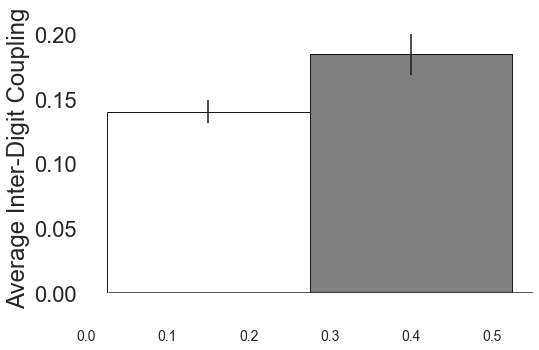

In [14]:
sns.set(font_scale = 2)
width = 0.25 
error_kw = {'capsize': 10, 'capthick': 1, 'ecolor': 'black','linewidth': 1}
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

plt.bar(0.15, augAv.mean(axis=1).mean(), width, alpha=1, color='white',edgecolor='k',linewidth=1,yerr=np.array([0,augAv.mean(axis=1).std()/np.sqrt(len(augAv.mean(axis=1)))])[1]) 
plt.bar(0.4, ctrAv.mean(axis=1).mean(), width, alpha=1, color='grey',edgecolor='k',linewidth=1,yerr=np.array([0,ctrAv.mean(axis=1).std()/np.sqrt(len(ctrAv.mean(axis=1)))])[1])
# Set the y axis label
ax.set_ylabel('Average Inter-Digit Coupling')

# Set the labels for the x ticks
#ax.set_xticklabels(["THUMB","INDEX","MIDDLE","RING","PINKY"])
ax.tick_params(axis='x', pad=30, labelsize=14)
# Add gridline
#ax.grid(color='k', linestyle='--', linewidth=0.5, axis ='y', which="both")
ax.set_facecolor('xkcd:white')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
#ax.legend(['Augmented','Controls'],loc='lower left', bbox_to_anchor=(1, 0.5))
ax.axhline(0, xmin=0.05, color="black")
ax.axvline(0, color="black")
plt.savefig('Cyberglove-AvCoupling.svg')
plt.show()
